#### Import Modules

In [1]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from read_write_util import ReadWriteUtil
from cleaning_pipeline import CleaningPipeline
from plot_util import *

In [2]:
warnings.filterwarnings('ignore')
read_write_util = ReadWriteUtil()
# Initialize Read and Write helper

#### Read Data

In [3]:
df_store = read_write_util.dvc_get_data(path="../data/store.csv", version="v1")
df_store.head()

2022-09-09 08:27:23,143:logger:../data/store.csv with version v1 Loaded


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [49]:
df_train = read_write_util.dvc_get_data(path="../data/train.csv", version='v1')
df_train.head()

2022-09-09 11:51:31,851:logger:../data/train.csv with version v1 Loaded


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [50]:
df_test = read_write_util.dvc_get_data("../data/test.csv", version='v1')
df_test.head()

2022-09-09 11:51:35,512:logger:../data/test.csv with version v1 Loaded


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


#### Sort and Index

In [51]:
df_test.sort_values(['Store', 'Date'], ignore_index=True, inplace=True)
df_train.sort_values(['Store', 'Date'], ignore_index=True, inplace=True)
# df_test.set_index('Date', inplace=True)
# df_train.set_index('Date', inplace=True)

#### Data Overview

In [52]:
print(f"SHAPE: {df_store.shape}")
df_store.info()

SHAPE: (1115, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Store                         1115 non-null   int64  
 1   StoreType                     1115 non-null   string 
 2   Assortment                    1115 non-null   string 
 3   CompetitionDistance           1115 non-null   float64
 4   CompetitionOpenSinceMonth     1115 non-null   int64  
 5   CompetitionOpenSinceYear      1115 non-null   int64  
 6   Promo2                        1115 non-null   int64  
 7   Promo2SinceWeek               1115 non-null   int64  
 8   Promo2SinceYear               1115 non-null   int64  
 9   PromoInterval                 1115 non-null   string 
 10  CompetitionBeforeStoreOpened  1115 non-null   int64  
 11  PromoInterval0                1115 non-null   int64  
 12  PromoInterval1                1115 non-null 

In [8]:
print(f"SHAPE: {df_train.shape}")
df_train.info()

SHAPE: (1017209, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [53]:
print(f"SHAPE: {df_test.shape}")
df_test.info()

SHAPE: (41088, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


#### Check for duplicates

`We have two unique values`

In [54]:
df_train.duplicated(subset=['Store']).all()

False

In [55]:
df_test.duplicated(subset=['Store']).all()


False

In [56]:
df_store.duplicated(subset=['Store']).all()

False

#### Basic cleaning using our pipeline

In [57]:
"""
Function descriptions
convert_to_string(self, df, columns): Converts types to string
convert_to_datetime(self, df, columns): Converts types to Datetime
add_custom_column(self, df, column, value): Add a column to our dataframe
"""
# df_train.reset_index()
pipeline = CleaningPipeline()
pipeline.run_pipeline(df_train, date_cols=['Date'], string_cols=['StateHoliday'])
# df_train.set_index('Date', inplace=True)


2022-09-09 11:52:00,035:logger:['StateHoliday'] converted to string.
2022-09-09 11:52:00,306:logger:['Date'] converted to datetime.
2022-09-09 11:52:05,727:logger:Column 'Year' added.
2022-09-09 11:52:07,605:logger:Column 'Month' added.
2022-09-09 11:52:09,273:logger:Column 'DayOfMonth' added.
2022-09-09 11:52:11,417:logger:Column 'WeekOfYear' added.
2022-09-09 11:52:11,685:logger:Column 'weekday' added.


#### Preprocess store data 

##### Handle missing values

In [14]:
totalCells = np.product(df_store.shape)
totalMissing = pipeline.percent_missing_values(df_store)
print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")
# Calculate percentage of missing values


2022-09-09 08:28:13,638:logger:2343 missing values found


The dataset contains 21.01 % missing values.


In [15]:
missing_table_df = pipeline.table_for_missing_values(df_store)
missing_table_df
#We can see that we have two relatable group with some pattern/relation
# we can see the missing values in these groups have the same number.

2022-09-09 08:28:15,957:logger:Your selected dataframe has 10 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.79,float64
Promo2SinceYear,544,48.79,float64
PromoInterval,544,48.79,object
CompetitionOpenSinceMonth,354,31.75,float64
CompetitionOpenSinceYear,354,31.75,float64
CompetitionDistance,3,0.27,float64


In [16]:
missing_rows = pipeline.count_missing_rows(df_store)
# Calculate total number of rows
total_rows = df_store.shape[0]

# Calculate the percentage of missing rows
print(f"{missing_rows} rows({round(((missing_rows/total_rows) * 100), 2)}%) contain atleast one missing value.")

2022-09-09 08:28:21,015:logger:750 rows have missing values


750 rows(67.26%) contain atleast one missing value.


In [17]:
missing_rows = pipeline.count_missing_rows(df_store[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']])
# Calculate total number of rows
total_rows = df_store.shape[0]

# Calculate the percentage of missing rows
print(f"{missing_rows} rows({round(((missing_rows/total_rows) * 100), 2)}%) contain atleast one missing value.")

#Rows with missing values for the columns ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

2022-09-09 08:28:23,752:logger:544 rows have missing values


544 rows(48.79%) contain atleast one missing value.


In [18]:

#Rows with missing values for the columns ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']
"""
Each columuns in ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'] and ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']
have missing values. 
These means the missing values in these groups appear at the same time as a cluster.The values of the columns 
in each group share a common information.We can further investigate.
"""
missing_rows = pipeline.count_missing_rows(df_store[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']])
# Calculate total number of rows
total_rows = df_store.shape[0]

# Calculate the percentage of missing rows
print(f"{missing_rows} rows({round(((missing_rows/total_rows) * 100), 2)}%) contain atleast one missing value.")


2022-09-09 08:28:25,413:logger:354 rows have missing values


354 rows(31.75%) contain atleast one missing value.


In [19]:
df_pr2 = df_store[df_store['Promo2SinceWeek'].isna()]
df_pr2.head(10)
#Missing rows for column 'Promo2SinceWeek'
#We can see that the Promo2 column is 0 for the first 10 rows.And We can infer that if there is no promotion the
#values for the columns ['Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval'] should be null.

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
22,23,d,a,4060.0,8.0,2005.0,0,NaN,NaN,NaN


In [20]:
pipeline.get_unique_values(df_pr2)

,Column,Unique values
0,Store,"[1, 758, 741, 742, 747, 751, 755, 757, 760, 4,..."
1,StoreType,"[a, d, c, b]"
2,Assortment,"[a, c, b]"
3,CompetitionDistance,"[250.0, 140.0, 50.0, 2640.0, 30.0, 420.0, 720...."
4,CompetitionOpenSinceMonth,"[9.0, 4.0, 11.0, 3.0, 12.0, 10.0, 7.0, 6.0, 2...."
5,CompetitionOpenSinceYear,"[2013.0, 2012.0, 2014.0, 2009.0, 2010.0, 2005...."
6,Promo2,[0]
7,Promo2SinceWeek,[]
8,Promo2SinceYear,[]
9,PromoInterval,[]


In [21]:
df_pr2['Promo2'].value_counts()

0    544
Name: Promo2, dtype: int64

In [22]:
#All rows with 0 value in their Promo2 columns have null values in the columns 
# ['Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval'].
"""
let's impute the missing values in the columns Promo2SinceWeek and Promo2SinceYear with 0 to convey 
the meaning of absence since year and week can't be 0.
For PromoInterval we should dig deeper what kind of data it holds since its data type is object.
"""
df_store['Promo2'].value_counts()


1    571
0    544
Name: Promo2, dtype: int64

In [23]:
pd.api.types.infer_dtype(df_store['PromoInterval'])

'string'

In [24]:
# all the unique values 
"""
For the column PromoInterval, we will impute it with '0,0,0,0' as the other values follow list-type format containing four months. 
So inorder to impute these columns we should first investigate if the values 
we will insert exist in each column as this will oppose our intention.
"""
df_store['PromoInterval'].value_counts()


Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [25]:
df_store[df_store['Promo2SinceWeek'] == 0].shape

(0, 10)

In [26]:
df_store[df_store['Promo2SinceYear'] == 0].shape

(0, 10)

In [27]:
df_store[df_store['PromoInterval'] == '0,0,0,0'].shape

(0, 10)

In [28]:
pipeline.fix_missing_value(df_store, ['Promo2SinceWeek', 'Promo2SinceYear'], 0)

2022-09-09 08:28:47,697:logger:544 missing values in the column Promo2SinceWeek have been replaced by 0.
2022-09-09 08:28:47,700:logger:544 missing values in the column Promo2SinceYear have been replaced by 0.


In [29]:
pipeline.fix_missing_value(df_store, ['PromoInterval'], '0,0,0,0')


2022-09-09 08:28:50,299:logger:544 missing values in the column PromoInterval have been replaced by 0,0,0,0.


In [30]:
# dataframe containing the missing rows for columns ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']
df_cosm = df_store[df_store['CompetitionOpenSinceMonth'].isna()]
df_cosm.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
25,26,d,a,2300.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
28,29,d,c,2170.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
31,32,a,a,2910.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
39,40,a,a,180.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
40,41,d,c,1180.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


In [31]:
# all unique values for each column in the dataframe
"""
from the column names and the data fields' description in the
challange document we can understand that if CompetitionOpenSinceMonth and CompetitionOpenSinceYear are null 
it means there was already a competition when the store was opened. So we need impute the missing values in a meaningful way.
Before doing that we will hold this meaning of an already existing competition in a separate column named
CompetitionBeforeStoreOpened so that we can make use of this information in our analysis and prediction.
This column will hold values of 0 and 1, 0 indicating the absence of competition at the time the store was 
opened and 1 indicating the presence of competition at the time the store was opened.
"""
pipeline.get_unique_values(df_cosm)

,Column,Unique values
0,Store,"[12, 853, 767, 766, 764, 762, 757, 756, 742, 7..."
1,StoreType,"[a, d, c, b]"
2,Assortment,"[c, a, b]"
3,CompetitionDistance,"[250.0, 2410.0, 50.0, 210.0, 840.0, 220.0, 150..."
4,CompetitionOpenSinceMonth,[]
5,CompetitionOpenSinceYear,[]
6,Promo2,"[1, 0]"
7,Promo2SinceWeek,"[0.0, 40.0, 14.0, 45.0, 31.0, 22.0, 5.0, 1.0, ..."
8,Promo2SinceYear,"[0.0, 2013.0, 2011.0, 2009.0, 2012.0, 2014.0, ..."
9,PromoInterval,"[0,0,0,0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Ma..."


In [32]:
# deriving new column
"""
We can impute the columns CompetitionOpenSinceMonth and CompetitionOpenSinceYear. So we will impute missing values in the
column CompetitionOpenSinceYear and CompetitionOpenSinceMonth with its minimun value and 1 respectively.
This kind of imputing assumes that the stores with missing values in these columns were opened after the first month
of the minimum year value in the column CompetitionOpenSinceYear.

"""
df_store['CompetitionBeforeStoreOpened'] = df_store['CompetitionOpenSinceYear'].apply(lambda x: 1 if np.isnan(x) else 0)
df_store[['CompetitionOpenSinceYear', 'CompetitionBeforeStoreOpened']]


,CompetitionOpenSinceYear,CompetitionBeforeStoreOpened
0,2008.0,0
1,2007.0,0
2,2006.0,0
3,2009.0,0
4,2015.0,0
...,...,...
1110,2014.0,0
1111,2006.0,0
1112,NaN,1
1113,NaN,1


In [33]:
min_year = df_store['CompetitionOpenSinceYear'].min()
min_year
#Find the minimum year value for CompetitionOpenSinceYear and impute the missing values.

1900.0

In [35]:
# impute the column CompetitionOpenSinceYear with 1900 and the column CompetitionOpenSinceMonth with 1
pipeline.fix_missing_value(df_store, ['CompetitionOpenSinceYear'], min_year)
pipeline.fix_missing_value(df_store, ['CompetitionOpenSinceMonth'], 1)

2022-09-09 08:29:16,293:logger:354 missing values in the column CompetitionOpenSinceYear have been replaced by 1900.0.
2022-09-09 08:29:16,296:logger:354 missing values in the column CompetitionOpenSinceMonth have been replaced by 1.


In [36]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0",0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"0,0,0,0",0


In [37]:
df_temp = df_store[df_store['CompetitionDistance'].isna()]
df_temp

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
290,291,d,a,NaN,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1
621,622,a,c,NaN,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1
878,879,d,a,NaN,1.0,1900.0,1,5.0,2013.0,"Feb,May,Aug,Nov",1


In [38]:
pipeline.get_unique_values(df_temp)

,Column,Unique values
0,Store,"[291, 622, 879]"
1,StoreType,"[d, a]"
2,Assortment,"[a, c]"
3,CompetitionDistance,[]
4,CompetitionOpenSinceMonth,[1.0]
5,CompetitionOpenSinceYear,[1900.0]
6,Promo2,"[0, 1]"
7,Promo2SinceWeek,"[0.0, 5.0]"
8,Promo2SinceYear,"[0.0, 2013.0]"
9,PromoInterval,"[0,0,0,0, Feb,May,Aug,Nov]"


In [39]:
max_dist = df_store['CompetitionDistance'].max()
max_dist
#the competitions for these stores are very far away and have almost no impact on these stores that they weren't measured
#when collecting the data. For this reason, 
#We will impute this values with the maximum competition distance.

75860.0

In [40]:
pipeline.fix_missing_value(df_store, ['CompetitionDistance'], max_dist)

2022-09-09 08:29:31,961:logger:3 missing values in the column CompetitionDistance have been replaced by 75860.0.


In [41]:
"""
store pipeline functions
convert_to_int(self, df, columns): Converts data type to int64
convert_to_string(self, df, columns): Converts data type to string
getMonth(self, month_list, index): spliting the col 'PromoInterval' to four separate columns
"""
pipeline.run_pipeline_for_store(df_store, 
    string_cols=['StoreType', 'Assortment', 'PromoInterval'],
    int_cols=['CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 'Promo2SinceYear']
    )



2022-09-09 08:29:33,628:logger:['StoreType', 'Assortment', 'PromoInterval'] converted to string.
2022-09-09 08:29:33,631:logger:['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear'] converted to int.


In [42]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",0,1,4,7,10
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",0,1,4,7,10
3,4,c,c,620.0,9,2009,0,0,0,"0,0,0,0",0,0,0,0,0
4,5,a,a,29910.0,4,2015,0,0,0,"0,0,0,0",0,0,0,0,0


#### Merge the two datasets

In [59]:
read_write_util.to_csv(df_train,"../data/train.csv")
# v2 for data/train.csv

2022-09-09 11:54:18,277:logger:Saved to path ../data/train.csv


In [43]:
read_write_util.to_csv(df_store, "../data/store.csv")
#v2 for data/store.csv

#### Merging dataset

In [40]:
df = pd.merge(df_train, df_store, how='inner', on='Store')
df.shape

(1017209, 28)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 28 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   Store                         1017209 non-null  int64         
 1   DayOfWeek                     1017209 non-null  int64         
 2   Date                          1017209 non-null  datetime64[ns]
 3   Sales                         1017209 non-null  int64         
 4   Customers                     1017209 non-null  int64         
 5   Open                          1017209 non-null  int64         
 6   Promo                         1017209 non-null  int64         
 7   StateHoliday                  1017209 non-null  string        
 8   SchoolHoliday                 1017209 non-null  int64         
 9   Year                          1017209 non-null  int64         
 10  Month                         1017209 non-null  int64         
 11

In [45]:
read_write_util.to_csv(df, "../data/train_merged_with_date.csv")
#v2train on data/train.csv

2022-09-08 12:47:06,812:logger:Saved to path ../data/train_merged_with_date.csv


In [44]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,2,2013-01-01,0,0,0,0,a,1,2013,...,2008.0,0,0.0,0.0,"0,0,0,0",0,0,0,0,0
1,1,3,2013-01-02,5530,668,1,0,0,1,2013,...,2008.0,0,0.0,0.0,"0,0,0,0",0,0,0,0,0
2,1,4,2013-01-03,4327,578,1,0,0,1,2013,...,2008.0,0,0.0,0.0,"0,0,0,0",0,0,0,0,0
3,1,5,2013-01-04,4486,619,1,0,0,1,2013,...,2008.0,0,0.0,0.0,"0,0,0,0",0,0,0,0,0
4,1,6,2013-01-05,4997,635,1,0,0,1,2013,...,2008.0,0,0.0,0.0,"0,0,0,0",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,1,2015-07-27,10712,608,1,1,0,1,2015,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,3,6,9,12
1017205,1115,2,2015-07-28,8093,500,1,1,0,1,2015,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,3,6,9,12
1017206,1115,3,2015-07-29,7661,473,1,1,0,1,2015,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,3,6,9,12
1017207,1115,4,2015-07-30,8405,502,1,1,0,1,2015,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,3,6,9,12


In [47]:
df_merged = read_write_util.dvc_get_data('../data/train.csv', 'v3merged')
df_merged

2022-09-06 19:28:23,915:logger:../data/train.csv with version v3merged Loaded


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,2,0,0,0,0,a,1,2013,1,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
1,1,3,5530,668,1,0,0,1,2013,1,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
2,1,4,4327,578,1,0,0,1,2013,1,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
3,1,5,4486,619,1,0,0,1,2013,1,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
4,1,6,4997,635,1,0,0,1,2013,1,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,1,10712,608,1,1,0,1,2015,7,...,1900,1,22,2012,"Mar,Jun,Sept,Dec",1,3,6,9,12
1017205,1115,2,8093,500,1,1,0,1,2015,7,...,1900,1,22,2012,"Mar,Jun,Sept,Dec",1,3,6,9,12
1017206,1115,3,7661,473,1,1,0,1,2015,7,...,1900,1,22,2012,"Mar,Jun,Sept,Dec",1,3,6,9,12
1017207,1115,4,8405,502,1,1,0,1,2015,7,...,1900,1,22,2012,"Mar,Jun,Sept,Dec",1,3,6,9,12


#### Univariate Analysis

##### Store types

In [48]:
counts_df = df_store['StoreType'].value_counts()
counts_df

a    602
d    348
c    148
b     17
Name: StoreType, dtype: Int64

In [49]:
plotly_plot_pie(df_store, 'StoreType')

##### Assortment

In [50]:
counts_df = df_store['Assortment'].value_counts()
counts_df

a    593
c    513
b      9
Name: Assortment, dtype: Int64

In [51]:
plotly_plot_pie(df_store, 'Assortment')

##### Promo2

In [52]:
counts_df = df_store['Promo2'].value_counts()
counts_df

1    571
0    544
Name: Promo2, dtype: int64

##### DayOfWeek

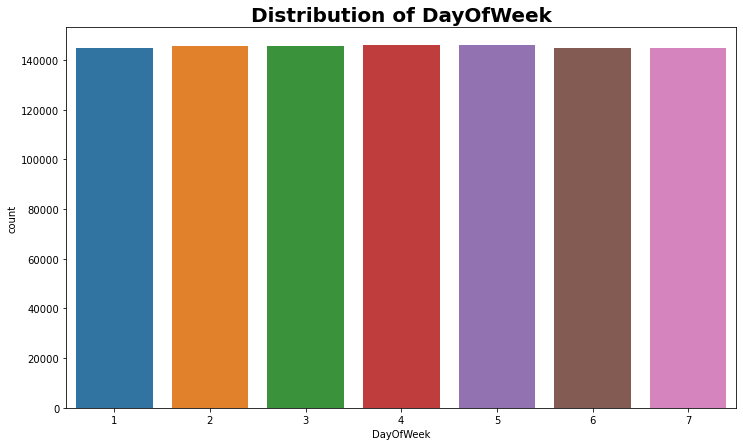

In [53]:
plot_count(df_train, 'DayOfWeek')

##### Competition Distance

In [54]:
plotly_plot_hist(df_store, 'CompetitionDistance')

##### Competition Before Store Opened

In [55]:
counts_df = df_store['CompetitionBeforeStoreOpened'].value_counts()
counts_df

0    761
1    354
Name: CompetitionBeforeStoreOpened, dtype: int64

#### Sales

In [56]:
# plot_hist(df_train, 'Sales')

#### Customers

In [57]:
# plot_hist(df_train, 'Customers')

#### Open

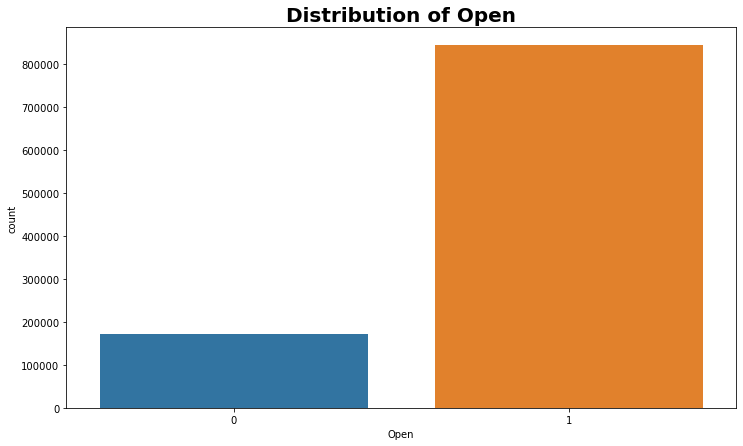

In [58]:
plot_count(df_train, 'Open')

#### Promo

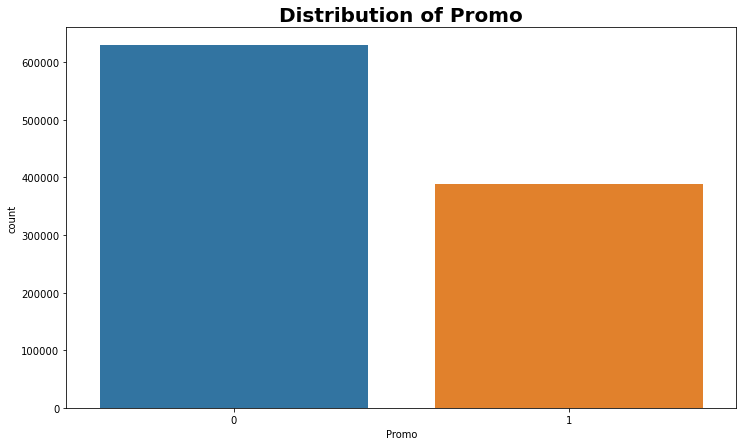

In [59]:
plot_count(df_train, 'Promo')

#### Holiday

##### School Holiday

In [60]:
counts_df = df_train['SchoolHoliday'].value_counts()
counts_df

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

##### State Holiday

In [61]:
counts_df = df_train['StateHoliday'].value_counts()
counts_df

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: Int64

#### Bivariate Analysis

##### School Holiday vs Sales and Customers

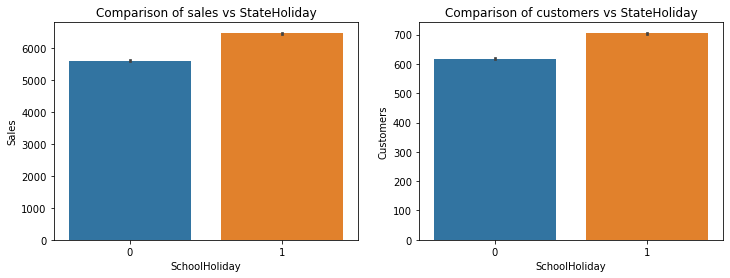

In [62]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x='SchoolHoliday', y='Sales', data=df_train, ax=axis1).set_title('Comparison of sales vs StateHoliday')
sns.barplot(x='SchoolHoliday', y='Customers', data=df_train, ax=axis2).set_title('Comparison of customers vs StateHoliday')
plt.show()

##### State Holoday and Sales

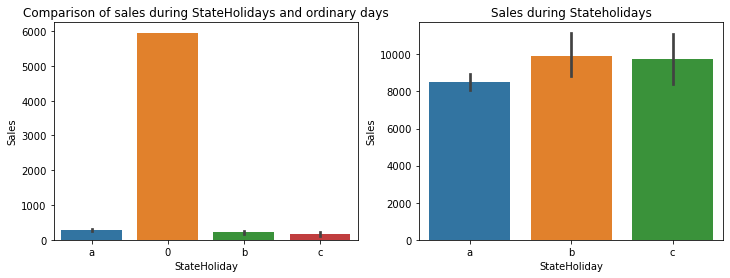

In [63]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='StateHoliday', y='Sales', data=df_train, ax=axis1).set_title('Comparison of sales during StateHolidays and ordinary days')

# holidays only
mask = (df_train["StateHoliday"] != "0") & (df_train["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=df_train[mask], ax=axis2).set_title('Sales during Stateholidays')
plt.show()

##### StoreType vs Sales and Customers

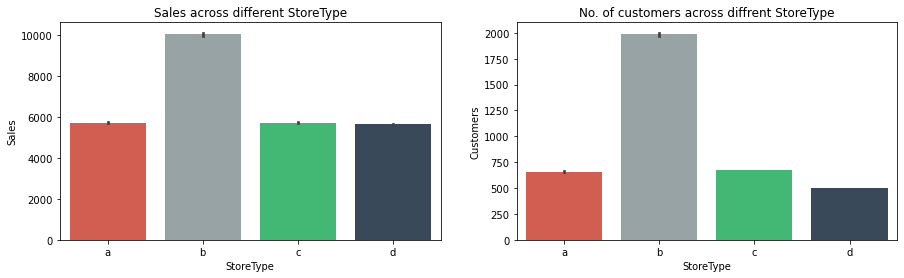

In [64]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=df, ax=axis1, palette = [ "#e74c3c","#95a5a6",  "#2ecc71", "#34495e"], order=['a','b','c', 'd']).set_title('Sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data=df, ax=axis2, palette = [ "#e74c3c","#95a5a6",  "#2ecc71", "#34495e"], order=['a','b','c', 'd']).set_title('No. of customers across diffrent StoreType')
plt.show()

##### Assortment vs Sales and Customers

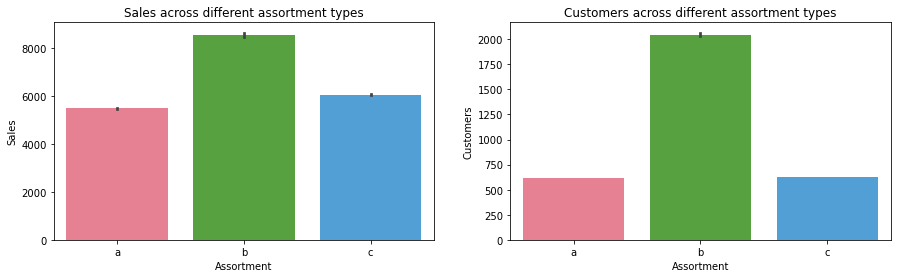

In [65]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=df, palette = 'husl', order=['a','b','c'], ax=axis1).set_title('Sales across different assortment types')
sns.barplot(x='Assortment', y='Customers', data=df, palette = 'husl', order=['a','b','c'], ax=axis2).set_title('Customers across different assortment types')
plt.show()

##### DayOfWeek vs Sales and Customers

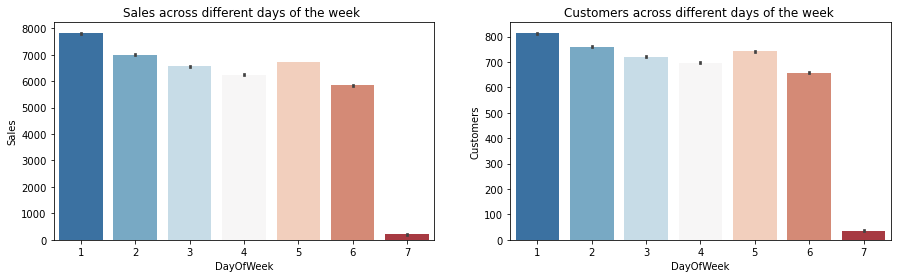

In [66]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=df_train, palette = 'RdBu_r', ax=axis1).set_title('Sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Customers', data=df_train, palette = 'RdBu_r', ax=axis2).set_title('Customers across different days of the week ')
plt.show()

##### Promo vs Sales and Customers

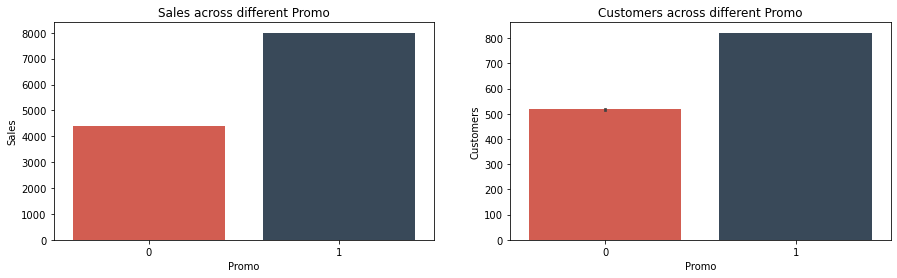

In [67]:
flatui = ["#e74c3c", "#34495e", "#2ecc71", "#9b59b6", "#3498db", "#95a5a6"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=df_train, palette = flatui, ax=axis1).set_title('Sales across different Promo')
sns.barplot(x='Promo', y='Customers', data=df_train, ax=axis2,  palette = flatui).set_title('Customers across different Promo')
plt.show()

##### Promo2 vs Sales and Customers

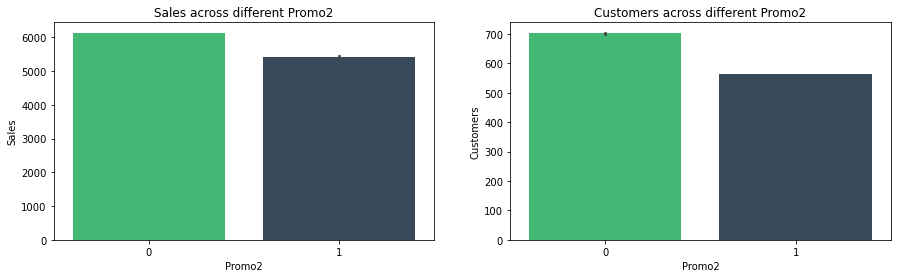

In [68]:
flatui = [ "#2fcc71", "#33495e"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo2', y='Sales', data=df, ax=axis1, palette = flatui).set_title('Sales across different Promo2')
sns.barplot(x='Promo2', y='Customers', data=df, ax=axis2, palette = flatui).set_title('Customers across different Promo2')
plt.show()

##### PromoInterval vs Sales and Customers

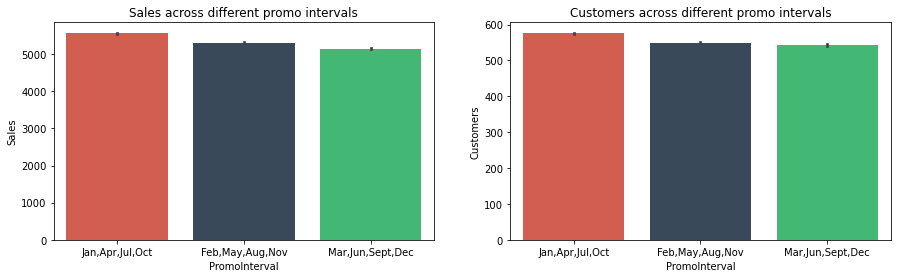

In [69]:
flatui = ["#e74c3c", "#34495e", "#2ecc71", "#9b59b6", "#3498db", "#95a5a6"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# values with promo2 only
mask = (df["Promo2"] != 0)

sns.barplot(x='PromoInterval', y='Sales', data=df[mask], ax=axis1, palette = flatui).set_title('Sales across different promo intervals')
sns.barplot(x='PromoInterval', y='Customers', data=df[mask], ax=axis2, palette = flatui).set_title('Customers across different promo intervals')
plt.show()

##### Open and DayOfWeek

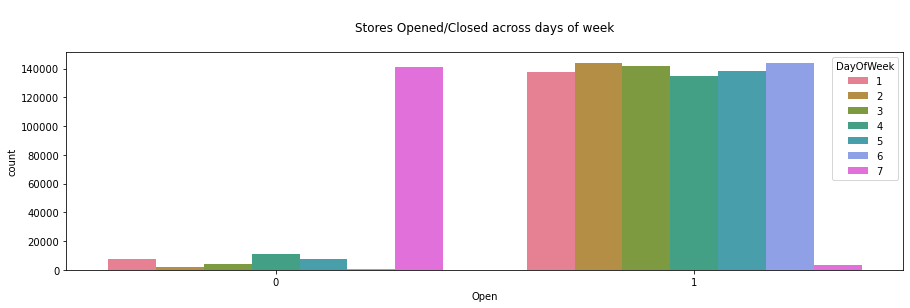

In [70]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=df_train,palette="husl", ax=axis1).set_title('\nStores Opened/Closed across days of week\n')
plt.show()

##### Sales and Month

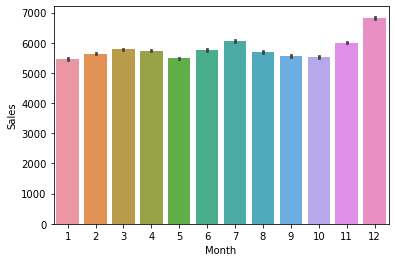

In [71]:
sns.barplot(x='Month', y='Sales', data=df)
plt.show()

##### CompetitionDistance and Sales

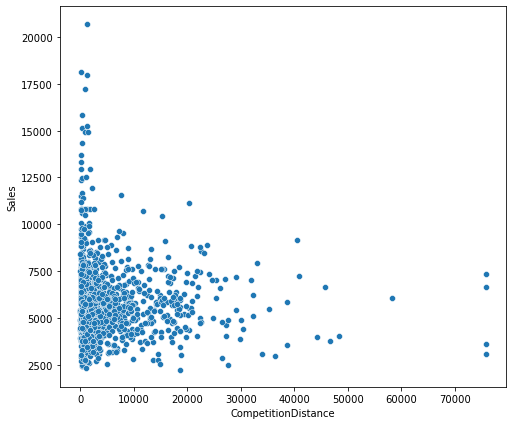

In [72]:
a = df.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})
plt.subplots(figsize = (8, 7))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=a)
plt.show()

##### Correlation Analysis

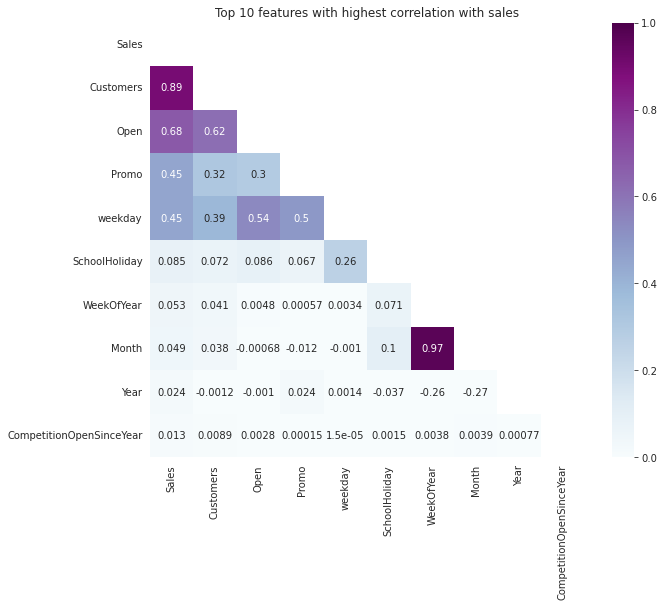

In [73]:
f_most_correlated = df.corr().nlargest(10,'Sales')['Sales'].index
f_correlation = df[f_most_correlated].corr()

# Generate a mask for the upper triangle
f_mask = np.zeros_like(f_correlation)
f_mask[np.triu_indices_from(f_mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(10, 8))
    f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="BuPu")
plt.title('Top 10 features with highest correlation with sales')
plt.show()

#### Answering Business Questions

##### Distribution of promotion in the training and test datasets

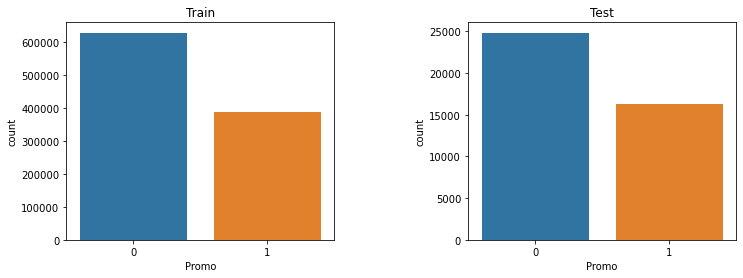

In [74]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
ax[0].set_title("Train")
sns.countplot(x='Promo', data=df_train, ax=ax[0])
ax[1].set_title("Test")
sns.countplot(x='Promo', data=df_test, ax=ax[1])
fig.subplots_adjust(wspace=0.5)
fig.show()
#We can see that the distribution of promotion in both datasets is almost the same

#### sales behavior before, during and after holidays

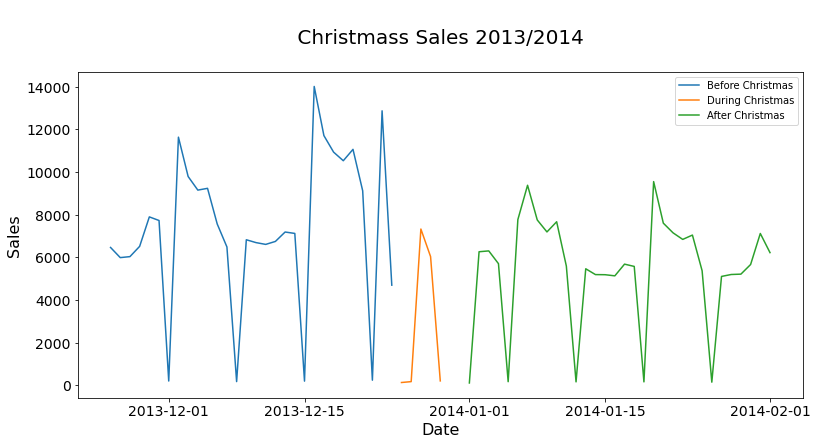

In [75]:
before_index = (df_train.index >= pd.to_datetime("2013-11-25")) & (df_train.index < pd.to_datetime("2013-12-25"))
before_xmass = df_train[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (df_train.index >= pd.to_datetime("2013-12-25")) & (df_train.index < pd.to_datetime("2013-12-30"))
during_xmass = df_train[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (df_train.index >= pd.to_datetime("2014-01-01")) & (df_train.index < pd.to_datetime("2014-02-02"))
after_xmass = df_train[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(13, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before Christmas')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During Christmas')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After Christmas')

plt.title("\n Christmass Sales 2013/2014 \n", size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Sales", fontsize=16)
plt.show()

#### Seasonal Sales Behavior

In [76]:
seasonal = df.groupby(by='StateHoliday').agg({'Sales':'mean', 'Customers':'mean'})
seasonal = seasonal.iloc[1:,:]
seasonal

,Sales,Customers
StateHoliday,,
a,290.735686,43.817670
b,214.311510,36.561883
c,168.733171,27.174390


<AxesSubplot:xlabel='StateHoliday'>

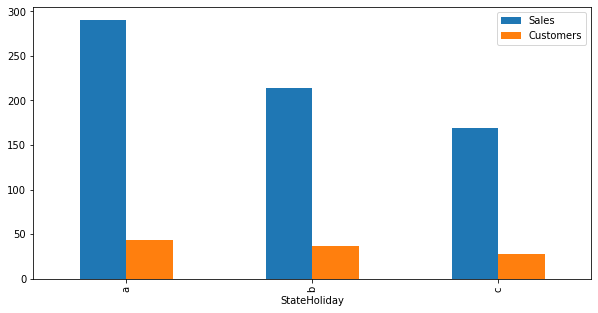

In [77]:
seasonal.plot(kind="bar",figsize=(10,5))

##### correlation between sales and number of customers

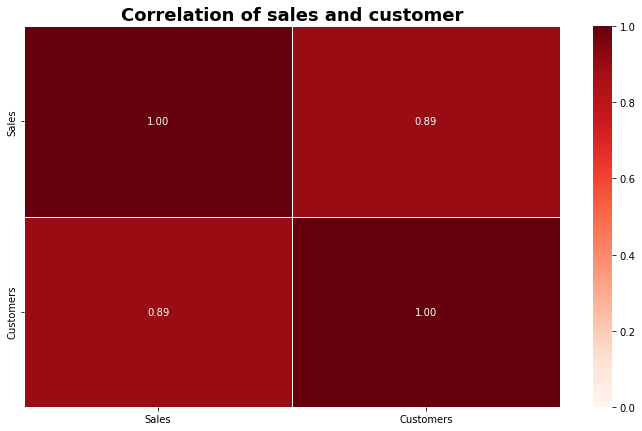

In [78]:
corelated_df = df[['Sales','Customers']].corr()
plot = plot_heatmap(corelated_df, "Correlation of sales and customer")
#We can see that number customer is highley correlated with customer

##### Monthly sales per StoreType and Promo

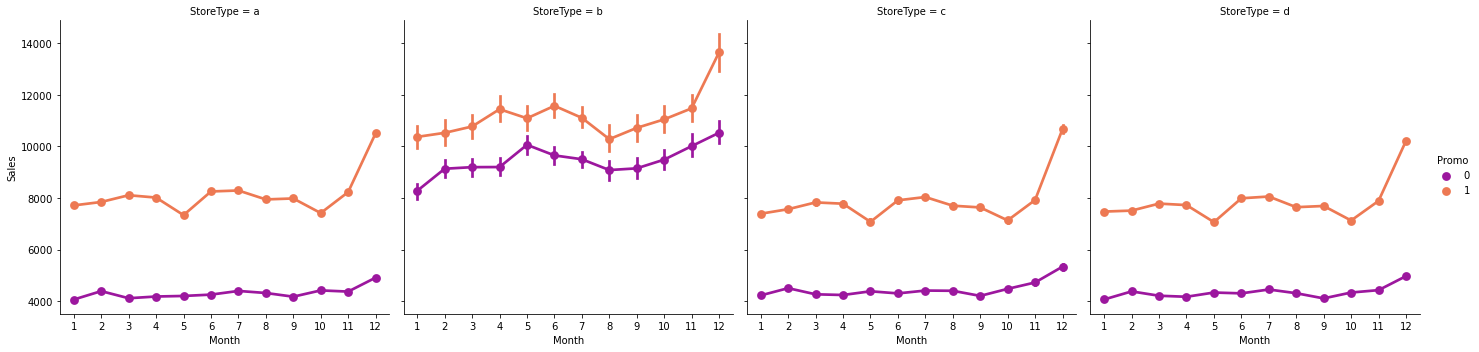

In [79]:
sns.factorplot(data = df, x = 'Month', y = "Sales",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               title='Promotion impact on sales per store types')
plt.show()

##### Monthly customers per StoreType and Promo

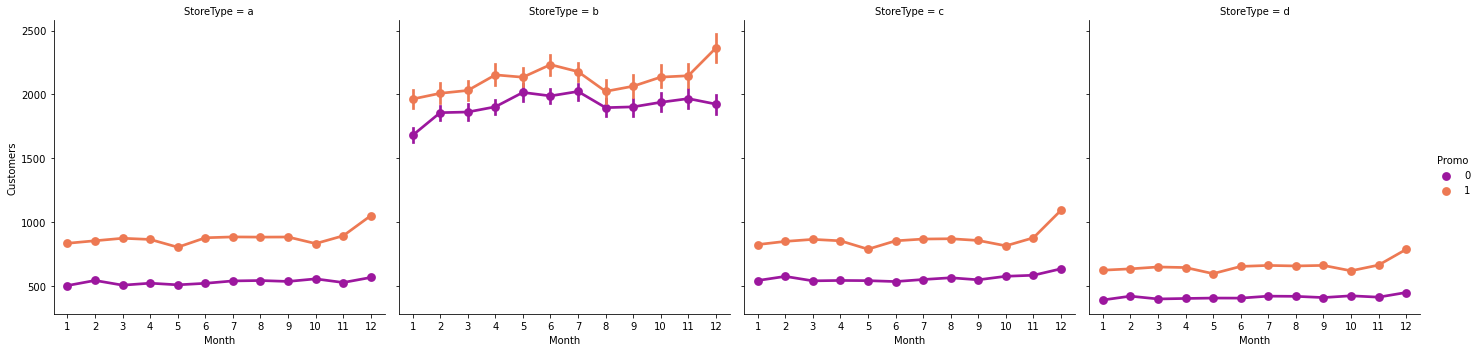

In [80]:
sns.factorplot(data = df, x = 'Month', y = "Customers",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               title='Promotion impact on sales per store types')
plt.show()

##### Monthly sales per Assortment and Promo

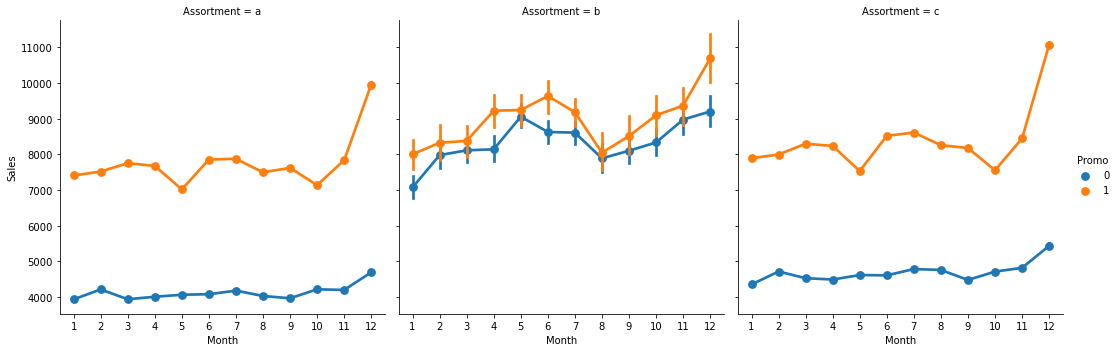

In [81]:
sns.factorplot(data = df, x = 'Month', y = 'Sales', col='Assortment', hue='Promo', col_order=['a','b','c'])
plt.show()

##### Monthly customers per Assortment and Promo

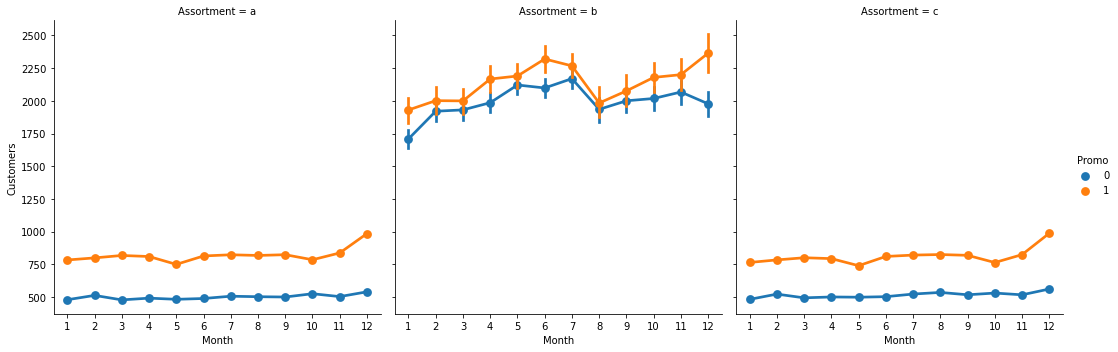

In [82]:
sns.factorplot(data = df, x = 'Month', y = 'Customers', col='Assortment', hue='Promo', col_order=['a','b','c'])
plt.show()

`We can see from the graphs above that applying promo increases sales and number of customer`
>>
`We can see that there is a high spike in the graph assortment vs promo and sales which means that even if the promo makes the sales to increase as in assortment c, we advise that kind of approach for all others`

##### Monthly sales trend per store type

In [83]:
store_type_a = df[df.StoreType == 'a']
store_type_b = df[df.StoreType == 'b']
store_type_c = df[df.StoreType == 'c']
store_type_d = df[df.StoreType == 'd']

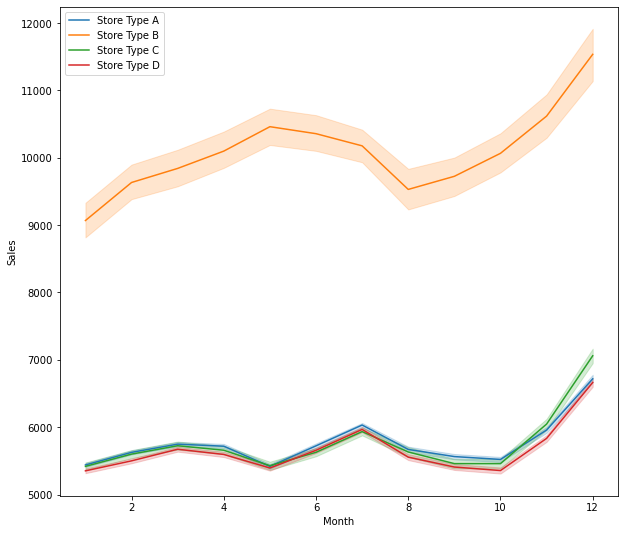

In [84]:
plt.subplots(figsize = (10, 9))
sns.lineplot(x = store_type_a.Month, y = store_type_a.Sales, label="Store Type A")
sns.lineplot(x = store_type_b.Month, y = store_type_b.Sales, label="Store Type B")
sns.lineplot(x = store_type_c.Month, y = store_type_c.Sales, label="Store Type C")
sns.lineplot(x = store_type_d.Month, y = store_type_d.Sales, label="Store Type D")
plt.show()

#### Trends of customer behavior during store open and closing times

In [85]:
customer_behaviour = df.groupby('Open').agg({'Customers':'sum','Sales':'sum'})
customer_behaviour

,Customers,Sales
Open,,
0,0,0
1,644041755,5873180623


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, -2000.0, '−2000'),
  Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000')])

<Figure size 1080x720 with 0 Axes>

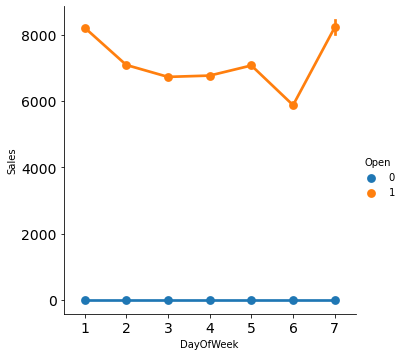

In [86]:
plt.figure(figsize=(15, 10))
sns.catplot(data=df, x="DayOfWeek", y="Sales", hue="Open", kind="point")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [87]:
weekdays_df = df[df['DayOfWeek'] <= 5]
no_holiday_df = weekdays_df[weekdays_df['StateHoliday'] == '0']
not_open_stores = no_holiday_df[no_holiday_df['Open'] == 0]
not_open_stores_list = not_open_stores['Store'].values.tolist()

closed_stores = df[df['Store'].isin(not_open_stores_list)]
open_stores = df[~df['Store'].isin(not_open_stores_list)]

<AxesSubplot:title={'center':'Stores Not Opening on all Weekdays'}, xlabel='DayOfWeek'>

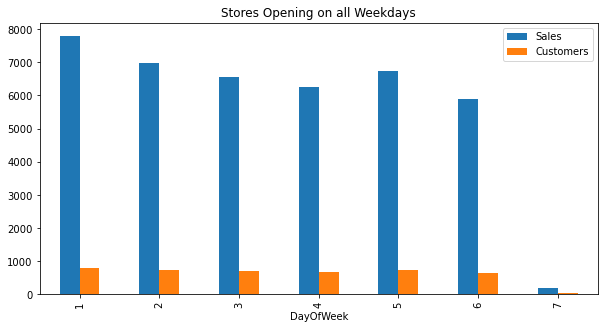

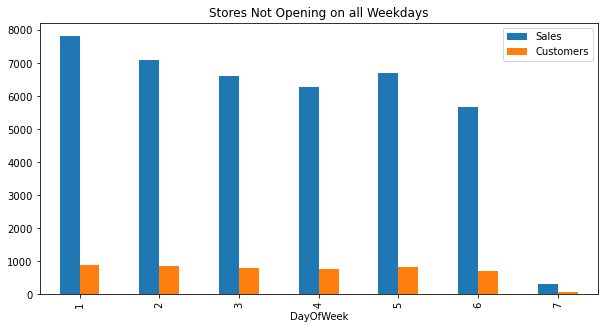

In [88]:
open_store_df = open_stores.groupby(['DayOfWeek']).agg({'Sales':'mean','Customers': 'mean'})
open_store_df.plot(kind="bar",figsize=(10,5),title="Stores Opening on all Weekdays")
close_store_df = closed_stores.groupby(['DayOfWeek']).agg({'Sales':'mean','Customers': 'mean'})
close_store_df.plot(kind="bar",figsize=(10,5),title="Stores Not Opening on all Weekdays")

#We can see above Stores Not Opening on all Weekdays have slightly higher
#sales than Stores that open all weekdays.

##### Sales of stores open per DayOfWeek and StoreType

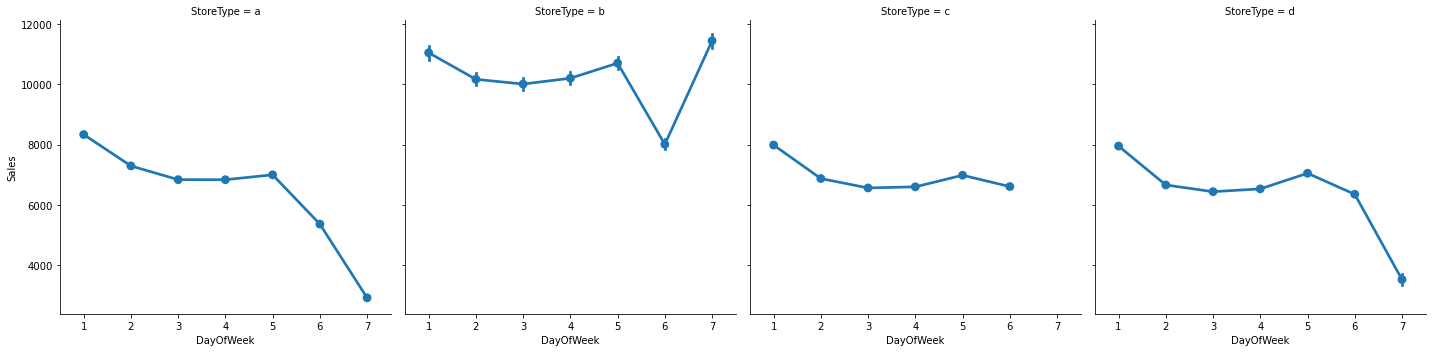

In [89]:
mask = (df["Open"] != 0)#Open stores only

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Sales', col='StoreType', col_order=['a','b','c', 'd'])
plt.show()

##### Customers of stores open per DayOfWeek and StoreType

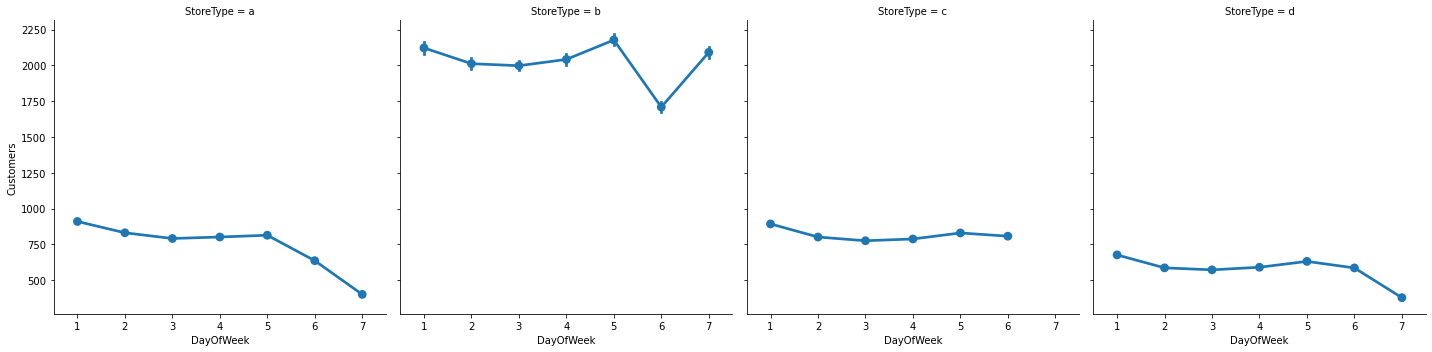

In [90]:
mask = (df["Open"] != 0)#Open stores

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Customers', col='StoreType', col_order=['a','b','c', 'd'])
plt.show()

##### Sales of stores open per DayOfWeek and Assortment

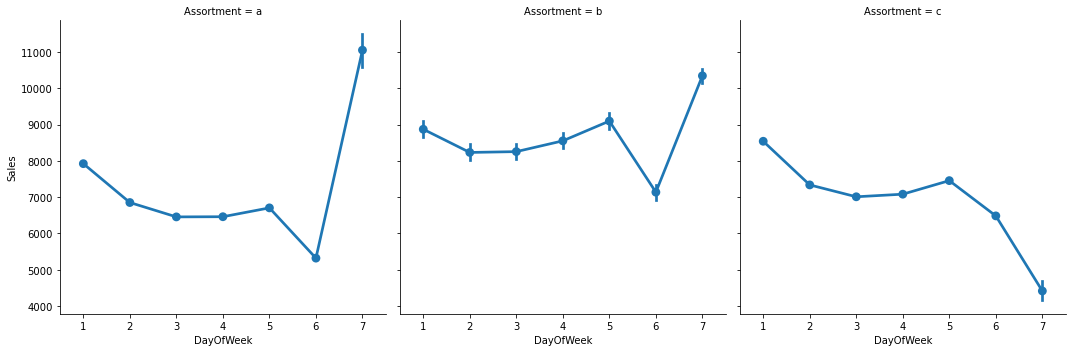

In [91]:
mask = (df["Open"] != 0) #Open stores

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Sales', col='Assortment', col_order=['a','b','c'])
plt.show()

##### Customers of stores open per DayOfWeek and Assortment

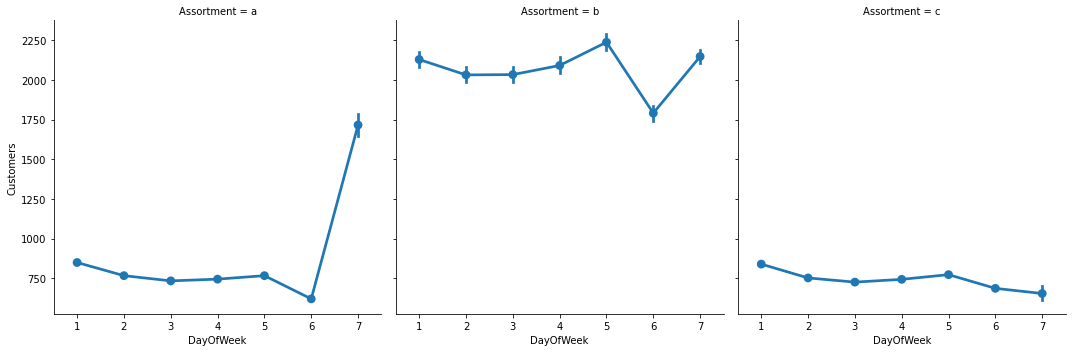

In [92]:
mask = (df["Open"] != 0)#Open stores

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Customers', col='Assortment', col_order=['a','b','c'])
plt.show()

#### Asortment Type vs Sales

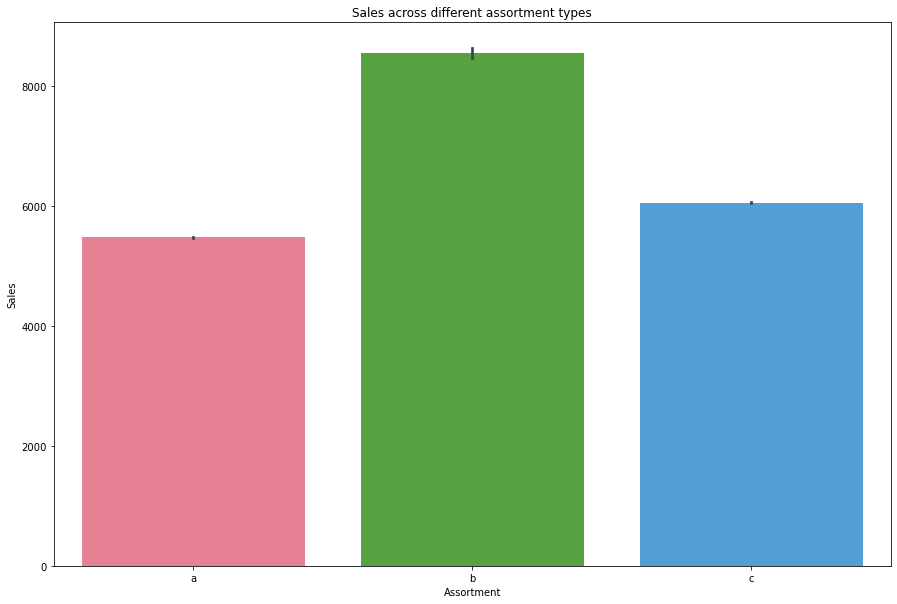

In [93]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Assortment', y='Sales', data=df, palette = 'husl', order=['a','b','c']).set_title('Sales across different assortment types')
plt.show()
#We can see that Assortment type b has the highest sales

#### How does the distance to the next competitor affect sales?

In [94]:
competition_distance_df = df[['Store','Sales','Customers','CompetitionDistance']]
store_competition_distance_group = competition_distance_df.groupby('Store').mean().reset_index()
store_competition_distance_group

,Store,Sales,Customers,CompetitionDistance
0,1,3945.704883,467.646497,1270.0
1,2,4122.991507,486.045648,570.0
2,3,5741.253715,620.286624,14130.0
3,4,8021.769639,1100.057325,620.0
4,5,3867.110403,444.360934,29910.0
...,...,...,...,...
1110,1111,4342.968153,373.548832,1900.0
1111,1112,8465.280255,693.498938,1880.0
1112,1113,5516.180467,596.763270,9260.0
1113,1114,17200.196391,2664.057325,870.0


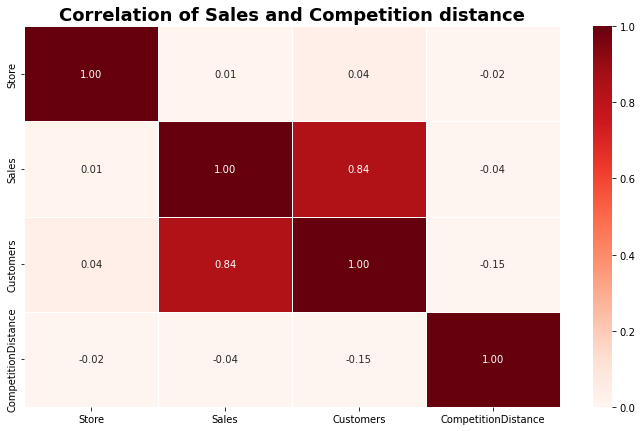

In [95]:
corelated_df = store_competition_distance_group.corr()
plot = plot_heatmap(corelated_df, "Correlation of Sales and Competition distance")

#We can see that Competition distance has lower effect on sales since its value is 0.01

#### How does the opening or reopening of new competitors affect stores?

In [102]:
df['CompetitionDist_Cat']=pd.cut(df['CompetitionDistance'], 5)
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3,CompetitionOpen,CompetitionDist_Cat
0,1,2,0,0,0,0,a,1,2013,1,...,0.0,0.0,"0,0,0,0",0,0,0,0,0,52.0,"(-55.84, 15188.0]"
1,1,3,5530,668,1,0,0,1,2013,1,...,0.0,0.0,"0,0,0,0",0,0,0,0,0,52.0,"(-55.84, 15188.0]"
2,1,4,4327,578,1,0,0,1,2013,1,...,0.0,0.0,"0,0,0,0",0,0,0,0,0,52.0,"(-55.84, 15188.0]"
3,1,5,4486,619,1,0,0,1,2013,1,...,0.0,0.0,"0,0,0,0",0,0,0,0,0,52.0,"(-55.84, 15188.0]"
4,1,6,4997,635,1,0,0,1,2013,1,...,0.0,0.0,"0,0,0,0",0,0,0,0,0,52.0,"(-55.84, 15188.0]"


In [103]:
df.groupby(by="CompetitionDist_Cat").Sales.mean(),df.groupby(by="CompetitionDist_Cat").Customers.mean()

(CompetitionDist_Cat
 (-55.84, 15188.0]     5773.260090
 (15188.0, 30356.0]    5859.219512
 (30356.0, 45524.0]    5531.206271
 (45524.0, 60692.0]    5131.027070
 (60692.0, 75860.0]    5268.038504
 Name: Sales, dtype: float64,
 CompetitionDist_Cat
 (-55.84, 15188.0]     640.199182
 (15188.0, 30356.0]    575.449432
 (30356.0, 45524.0]    581.246611
 (45524.0, 60692.0]    552.551486
 (60692.0, 75860.0]    563.576451
 Name: Customers, dtype: float64)

`This doesn't mean automatically that the furthest the better, but it does shed light on the fact that when there are no competition nearby, stores tend to sell more and have more customers because there are almost a monopoly in this region. We could think of it as McDonalds on highways where there are no other restaurants around, people who are hungry are forced to go there to eat.`

#### Findings 

<ol>
<li>The most selling and crowded store type is b.</li>
<li>The most selling and crowded assortment is b.</li>
<li>Sales is highly correlated to customers.</li>
<li>For all stores, promotion leads to increase in Sales and Customers. But promotions have low impact on store type b and assortment b when comparing to the other store types and assortments. So promotions should be applied more in the other store types and assortments.</li>
<li>Store type b is the most opened store type on all weekdays and has its highest sales on sundays than the other days.</li>
<li>Assortment a and b are the most opened assortments on all weekdays and have their highest sales on sundays than the other days. The number of cusomers increase dramatically on sundays for assortment a while it is similar with other week days for assortment b.</li>
<li>Sales are increased during Chirstmas week, especially the week before. This might be due to the fact that people buy more beauty products or some common medicines for precaution during Christmas celebration.</li>
<li>Stores with the smallest competition distance have the highest sales. This indicates that the stores are located at city center or near hospitals. Even though having large distance between competitors is ideally considered great for sales, stores located at city centers will still get more sales regardless of competitors distance as there are more customers at city centers.</li>
</ol>